# Análise Probabilidade de ser diabética segundo informações básicas

Para esse projeto de Data Science seguiremos essas etapas

1. Entendimento do problema
2. Obtenção dos dados
3. Limpeza dos dados e Análise Exploratória
4. Modelos de Machine Learning
5. Avaliação dos modelos


## 1. Entendimento do problema

### Objetivo


Estimar a probabilidade de uma pessoa do sexo feminino (cis) ser diabética de acordo com algumas variáveis de fácil obtenção para uma pessoa

### Dados

https://gist.githubusercontent.com/davidneves11/944edb5ecb7bf6d1770eae91cb20d049/raw/50d3d054185815b0c49561f94badedc06ef3c313/diabetes.csv
(Base de dados de um curso da Alura)

### Definição das variáveis


- quantidade_gravidez: indica a qunatidade de vezes que aquela pessoa já engravidou
- concentracao_glicose: como o nome diz, indica a concentração da glicose na corrente sanguínea 2 horas após a ingestão de solução de glicose (mg/dL)
- pressao: apresenta a pressão diastólica do indivíduo
- espessura_triceps: espessura do tríceps em mm (medida por um adipômetro)
- insulina: mostra o nível de insulina na corrente sanguínea 2 horas após a ingestão de solução de glicose (mu U/ml)
- imc: índice de massa corporal do indivíduo. Relação entre o peso e a altura (peso/altura^2)
- diabetes_pedigree: função que indica a predisposição genética para diabetes
- idade: indica a idade em anos
- resultado: indica se o indivíduo é diabético ou não: variável dependente que queremos descobrir

## 2. Obtenção dos dados


In [1]:
import pandas as pd

In [2]:
url = 'https://gist.githubusercontent.com/davidneves11/944edb5ecb7bf6d1770eae91cb20d049/raw/50d3d054185815b0c49561f94badedc06ef3c313/diabetes.csv'

In [3]:
dados = pd.read_csv(url)

In [4]:
dados.head()

,quantidade_gravidez,concentracao_glicose,pressao,espessura_triceps,insulina,imc,diabetes_pedigree,idade,resultado
0,6,148,72,35,0,33.6,0.627,50,testado_positivo
1,1,85,66,29,0,26.6,0.351,31,testado_negativo
2,8,183,64,0,0,23.3,0.672,32,testado_positivo
3,1,89,66,23,94,28.1,0.167,21,testado_negativo
4,0,137,40,35,168,43.1,2.288,33,testado_positivo


## 3. Limpeza dos dados e Análise Exploratória

Analisando as features apresentadas, vamos excluir as colunas 'espessura_triceps' e 'diabetes_pedigree'. 
- A primeira por ser uma medida de dobra cutânea na região do triceps e necessita ser medida utilizando um adipômetro
- Em relação à variável 'diabetes_pedigree', esta será retirada pois nem todos tem esse tipo de informação por ser um indicador que mede a tendência genética para diabetes


In [5]:
dados.drop(['espessura_triceps', 'diabetes_pedigree'], axis = 1, inplace=True)

In [6]:
dados.head()

,quantidade_gravidez,concentracao_glicose,pressao,insulina,imc,idade,resultado
0,6,148,72,0,33.6,50,testado_positivo
1,1,85,66,0,26.6,31,testado_negativo
2,8,183,64,0,23.3,32,testado_positivo
3,1,89,66,94,28.1,21,testado_negativo
4,0,137,40,168,43.1,33,testado_positivo


In [7]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   quantidade_gravidez   768 non-null    int64  
 1   concentracao_glicose  768 non-null    int64  
 2   pressao               768 non-null    int64  
 3   insulina              768 non-null    int64  
 4   imc                   768 non-null    float64
 5   idade                 768 non-null    int64  
 6   resultado             768 non-null    object 
dtypes: float64(1), int64(5), object(1)
memory usage: 42.1+ KB


Nota-se que não existem dados faltantes

### Análise das variáveis

In [8]:
dados.describe()

,quantidade_gravidez,concentracao_glicose,pressao,insulina,imc,idade
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,79.799479,31.992578,33.240885
std,3.369578,31.972618,19.355807,115.244002,7.884160,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,27.300000,24.000000
50%,3.000000,117.000000,72.000000,30.500000,32.000000,29.000000
75%,6.000000,140.250000,80.000000,127.250000,36.600000,41.000000
max,17.000000,199.000000,122.000000,846.000000,67.100000,81.000000


#### Funções para visualização dos outliers usando Boxplot

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

def limites(coluna):
    # define os quartis e retorna os limites máximos
    q1 = coluna.quantile(0.25)
    q3 = coluna.quantile(0.75)
    amplitude = q3 - q1
    return q1 - 1.5 * amplitude, q3 + 1.5 * amplitude
def excluir_outliers(df, nome_coluna):
    #exclui os outliers fora dos limites observados na função anterior
    qtde_linhas = df.shape[0]
    lim_inf, lim_sup = limites(df[nome_coluna])
    df = df.loc[(df[nome_coluna] >= lim_inf) & (df[nome_coluna] <= lim_sup), :]
    linhas_removidas = qtde_linhas - df.shape[0]
    return df,  linhas_removidas

In [10]:
def diagrama_caixa(coluna):
    # Plota 2 boxplots: um com todos os valores e outro sem os outliers o que permite uma melhor visualização
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(15, 5)
    sns.boxplot(x=coluna, ax=ax1)
    ax2.set_xlim(limites(coluna))
    sns.boxplot(x=coluna, ax=ax2)

### Análise da variável 'quantidade_gravidez'

In [11]:
dados.quantidade_gravidez.value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: quantidade_gravidez, dtype: int64

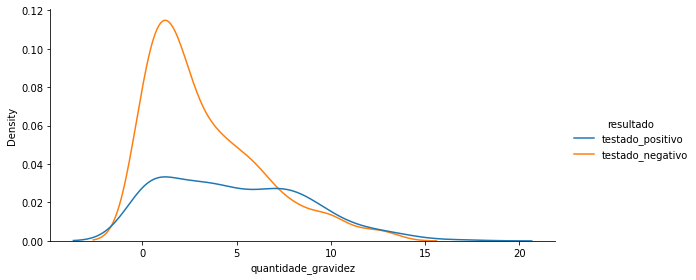

In [12]:

sns.displot(dados, x = dados.quantidade_gravidez, kind='kde', hue=dados.resultado,height=4, aspect=2)

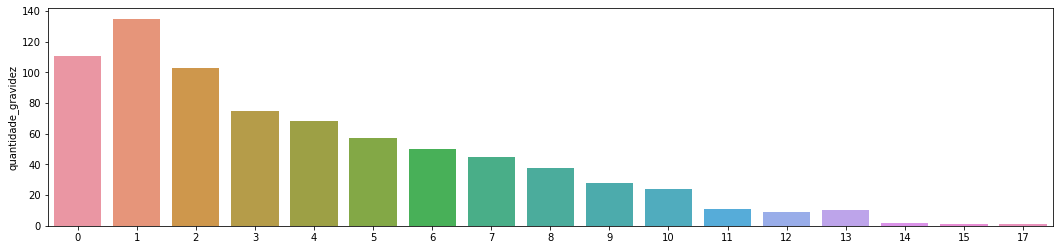

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 4))
sns.barplot(x=dados.quantidade_gravidez.value_counts().index, y=dados.quantidade_gravidez.value_counts())

Pelo gráfico acima, nota-se uma pequena qd quantidade_gravidez > 10

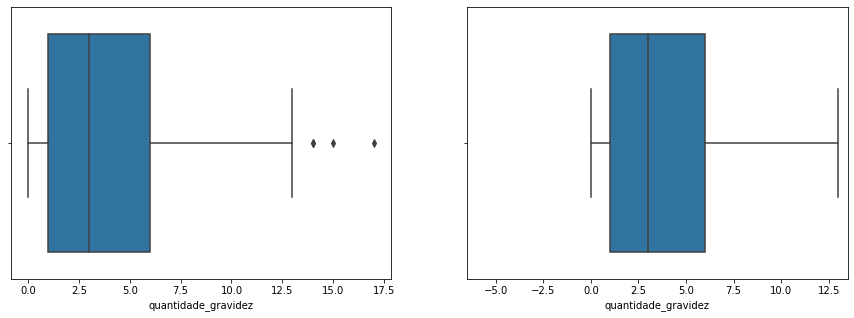

In [14]:
#Boxplot
diagrama_caixa(dados.quantidade_gravidez)

In [15]:
dados[dados.quantidade_gravidez > 10].resultado.value_counts()

testado_positivo    20
testado_negativo    14
Name: resultado, dtype: int64

Nesse caso, ao invés de excluir os outliers, iremos juntar as amostras com variável quantidade_gravidez maior que 10

In [16]:
dados.loc[dados.quantidade_gravidez > 10, 'quantidade_gravidez'] = 11


### Análise variável 'concentracao_glicose'

In [17]:
dados.concentracao_glicose.unique()


array([148,  85, 183,  89, 137, 116,  78, 115, 197, 125, 110, 168, 139,
       189, 166, 100, 118, 107, 103, 126,  99, 196, 119, 143, 147,  97,
       145, 117, 109, 158,  88,  92, 122, 138, 102,  90, 111, 180, 133,
       106, 171, 159, 146,  71, 105, 101, 176, 150,  73, 187,  84,  44,
       141, 114,  95, 129,  79,   0,  62, 131, 112, 113,  74,  83, 136,
        80, 123,  81, 134, 142, 144,  93, 163, 151,  96, 155,  76, 160,
       124, 162, 132, 120, 173, 170, 128, 108, 154,  57, 156, 153, 188,
       152, 104,  87,  75, 179, 130, 194, 181, 135, 184, 140, 177, 164,
        91, 165,  86, 193, 191, 161, 167,  77, 182, 157, 178,  61,  98,
       127,  82,  72, 172,  94, 175, 195,  68, 186, 198, 121,  67, 174,
       199,  56, 169, 149,  65, 190])

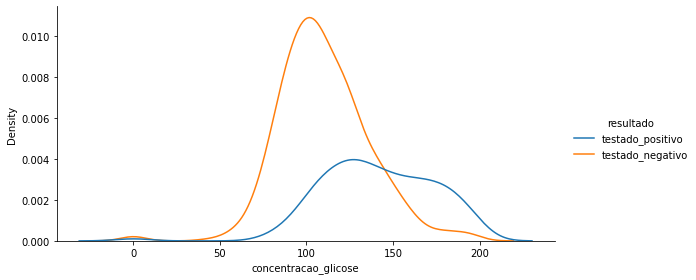

In [18]:

sns.displot(dados, x = dados.concentracao_glicose, kind='kde', hue=dados.resultado, height=4,aspect=2)

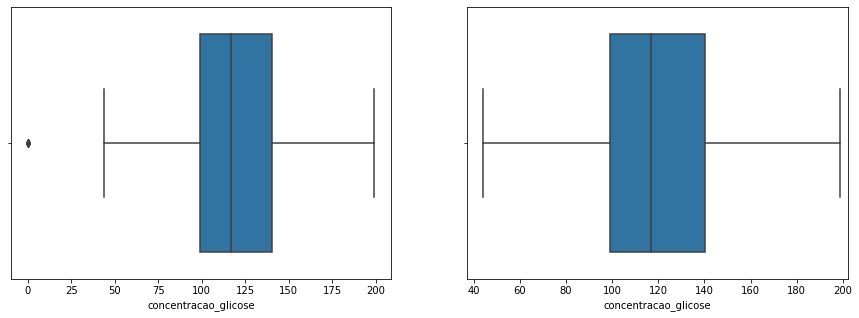

In [19]:
diagrama_caixa(dados.concentracao_glicose)

In [20]:
dados[dados.concentracao_glicose < 40 ]

,quantidade_gravidez,concentracao_glicose,pressao,insulina,imc,idade,resultado
75,1,0,48,0,24.7,22,testado_negativo
182,1,0,74,23,27.7,21,testado_negativo
342,1,0,68,0,32.0,22,testado_negativo
349,5,0,80,0,41.0,37,testado_positivo
502,6,0,68,0,39.0,41,testado_positivo


Observa-se 5 dados com valores de glicose zerados. Vamos excluir esses dados assumindo serem dados faltantes que foram substituidos pelo valor 0

In [21]:
dados = dados[dados.concentracao_glicose > 0]

In [22]:
dados.loc[dados.concentracao_glicose >190].resultado.value_counts()

testado_positivo    13
testado_negativo     4
Name: resultado, dtype: int64

### Analisando variável pressao

In [23]:
dados.pressao.unique()

array([ 72,  66,  64,  40,  74,  50,   0,  70,  96,  92,  80,  60,  84,
        30,  88,  90,  94,  76,  82,  75,  58,  78,  68, 110,  56,  62,
        85,  86,  44,  65, 108,  55,  48, 122,  54,  52,  98, 104,  95,
        46, 102, 100,  61,  24,  38, 106, 114])

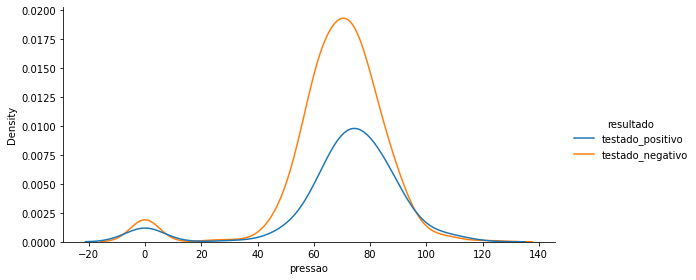

In [24]:
sns.displot(dados, x = dados.pressao, kind='kde', hue=dados.resultado, height=4, aspect=2)

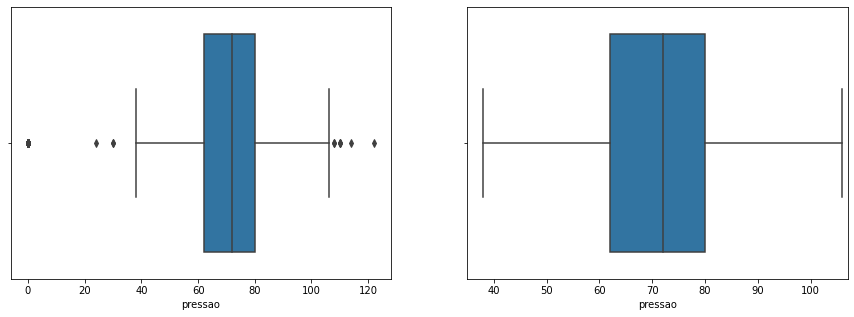

In [25]:
diagrama_caixa(dados.pressao)

Nota-se que quando a pressão está zerada, outras variáveis tb se mostram zeradas (espessura do triceps e insulina).
Dessa forma, pelo mesmo motivo da variável concentracao_glicose, iremos excluir as 35 linhas com tais valores zerados

In [26]:
dados = dados[dados.pressao > 0]

In [27]:
dados[dados.pressao < 40]

,quantidade_gravidez,concentracao_glicose,pressao,insulina,imc,idade,resultado
18,1,103,30,83,43.3,33,testado_negativo
125,1,88,30,99,55.0,26,testado_positivo
597,1,89,24,25,27.8,21,testado_negativo
599,1,109,38,120,23.1,26,testado_negativo


In [28]:
dados[dados.pressao > 100]

,quantidade_gravidez,concentracao_glicose,pressao,insulina,imc,idade,resultado
43,9,171,110,240,45.4,54,testado_positivo
84,5,137,108,0,48.8,37,testado_positivo
106,1,96,122,0,22.4,27,testado_negativo
177,0,129,110,130,67.1,26,testado_positivo
207,5,162,104,0,37.7,52,testado_positivo
362,5,103,108,0,39.2,65,testado_negativo
369,1,133,102,140,32.8,45,testado_positivo
440,0,189,104,0,34.3,41,testado_positivo
549,4,189,110,0,28.5,37,testado_negativo
658,11,127,106,0,39.0,51,testado_negativo


### Analisando a coluna insulina

Valores normais após ingestão de 75 g de glicose anidra na ausência de gravidez.

![Normal](https://biolider.com.br/wp-content/uploads/2021/04/Imagem2-25.png)

In [29]:
dados.insulina.value_counts()

0      335
105     11
140      9
130      9
120      8
      ... 
271      1
108      1
270      1
112      1
846      1
Name: insulina, Length: 186, dtype: int64

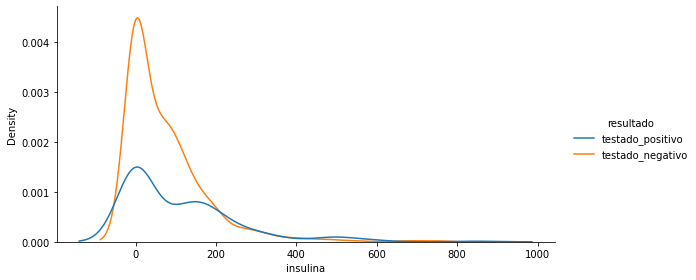

In [30]:
sns.displot(dados, x = dados.insulina, kind='kde', hue=dados.resultado, height=4, aspect=2)

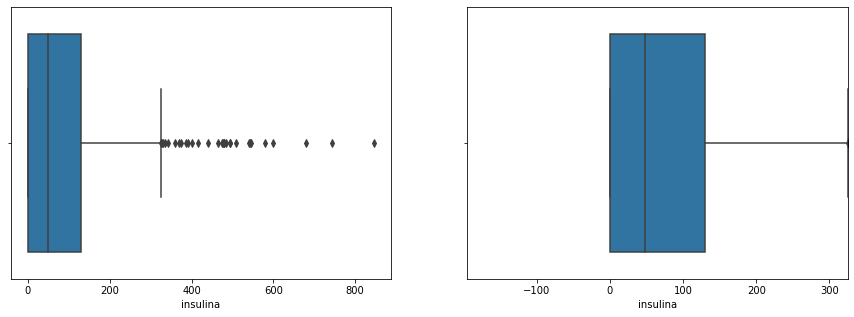

In [31]:
diagrama_caixa(dados.insulina)

In [32]:
dados.loc[dados.insulina == 0].resultado.value_counts()

testado_negativo    215
testado_positivo    120
Name: resultado, dtype: int64

Nos casos de diabetes tipo 1 as pessoas não conseguem produzir insulina ou produzem insuficientemente. Entretanto, vemos que a maior parcela da amostra com valores nulos de insulina testou negativo para diabetes. Dessa forma, assume-se que aqueles que não realizaram o exame de insulina tb foram computados com insulina zerada. Com isso, assim como anteriormente, excluiremos as colunas com valores 0, porém apenas aquelas com resultado de diabetes negativo

In [33]:
selecao = dados[(dados.insulina == 0) & (dados.resultado == 'testado_negativo')]
selecao

,quantidade_gravidez,concentracao_glicose,pressao,insulina,imc,idade,resultado
1,1,85,66,0,26.6,31,testado_negativo
5,5,116,74,0,25.6,30,testado_negativo
10,4,110,92,0,37.6,30,testado_negativo
12,10,139,80,0,27.1,57,testado_negativo
21,8,99,84,0,35.4,50,testado_negativo
...,...,...,...,...,...,...,...
756,7,137,90,0,32.0,39,testado_negativo
758,1,106,76,0,37.5,26,testado_negativo
762,9,89,62,0,22.5,33,testado_negativo
764,2,122,70,0,36.8,27,testado_negativo


In [34]:
dados = dados.drop(selecao.index)

In [35]:
dados.loc[dados.insulina == 0]

,quantidade_gravidez,concentracao_glicose,pressao,insulina,imc,idade,resultado
0,6,148,72,0,33.6,50,testado_positivo
2,8,183,64,0,23.3,32,testado_positivo
9,8,125,96,0,0.0,54,testado_positivo
11,10,168,74,0,38.0,34,testado_positivo
17,7,107,74,0,29.6,31,testado_positivo
...,...,...,...,...,...,...,...
754,8,154,78,0,32.4,45,testado_positivo
757,0,123,72,0,36.3,52,testado_positivo
759,6,190,92,0,35.5,66,testado_positivo
761,9,170,74,0,44.0,43,testado_positivo


### Analisando a variável imc

In [36]:
dados[dados.imc == 0]

,quantidade_gravidez,concentracao_glicose,pressao,insulina,imc,idade,resultado
9,8,125,96,0,0.0,54,testado_positivo
371,0,118,64,89,0.0,21,testado_negativo


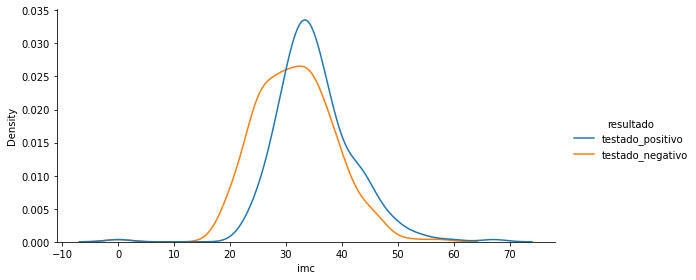

In [37]:
sns.displot(dados, x = dados.imc, kind='kde', hue=dados.resultado, height=4, aspect=2)

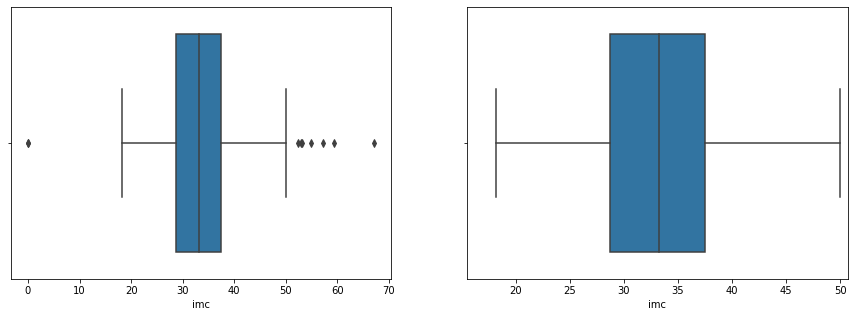

In [38]:
diagrama_caixa(dados.imc)

Como não existe a possibilidade de um indivíduo apresentar imc = 0, assumiremos que este valor foi colocado para preencher dados faltantes. Dessa forma, estaremos excluindo quando imc = 0

In [39]:
dados = dados[dados.imc > 0]

### Analisando a coluna resultado

In [40]:
dados.resultado.value_counts()

testado_negativo    262
testado_positivo    249
Name: resultado, dtype: int64

Codificando a variável categórica resultado em 0,1

In [41]:
dados['resultado'] = dados['resultado'].map({'testado_positivo': 1, 'testado_negativo': 0})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


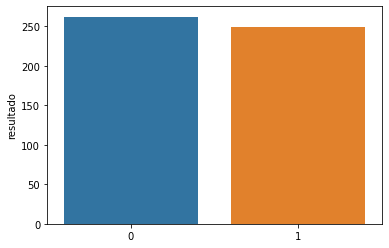

In [42]:
sns.barplot(x=dados.resultado.value_counts().index, y=dados.resultado.value_counts())

In [43]:
dados.head()

,quantidade_gravidez,concentracao_glicose,pressao,insulina,imc,idade,resultado
0,6,148,72,0,33.6,50,1
2,8,183,64,0,23.3,32,1
3,1,89,66,94,28.1,21,0
4,0,137,40,168,43.1,33,1
6,3,78,50,88,31.0,26,1


### Avaliando a relação entre as variáveis

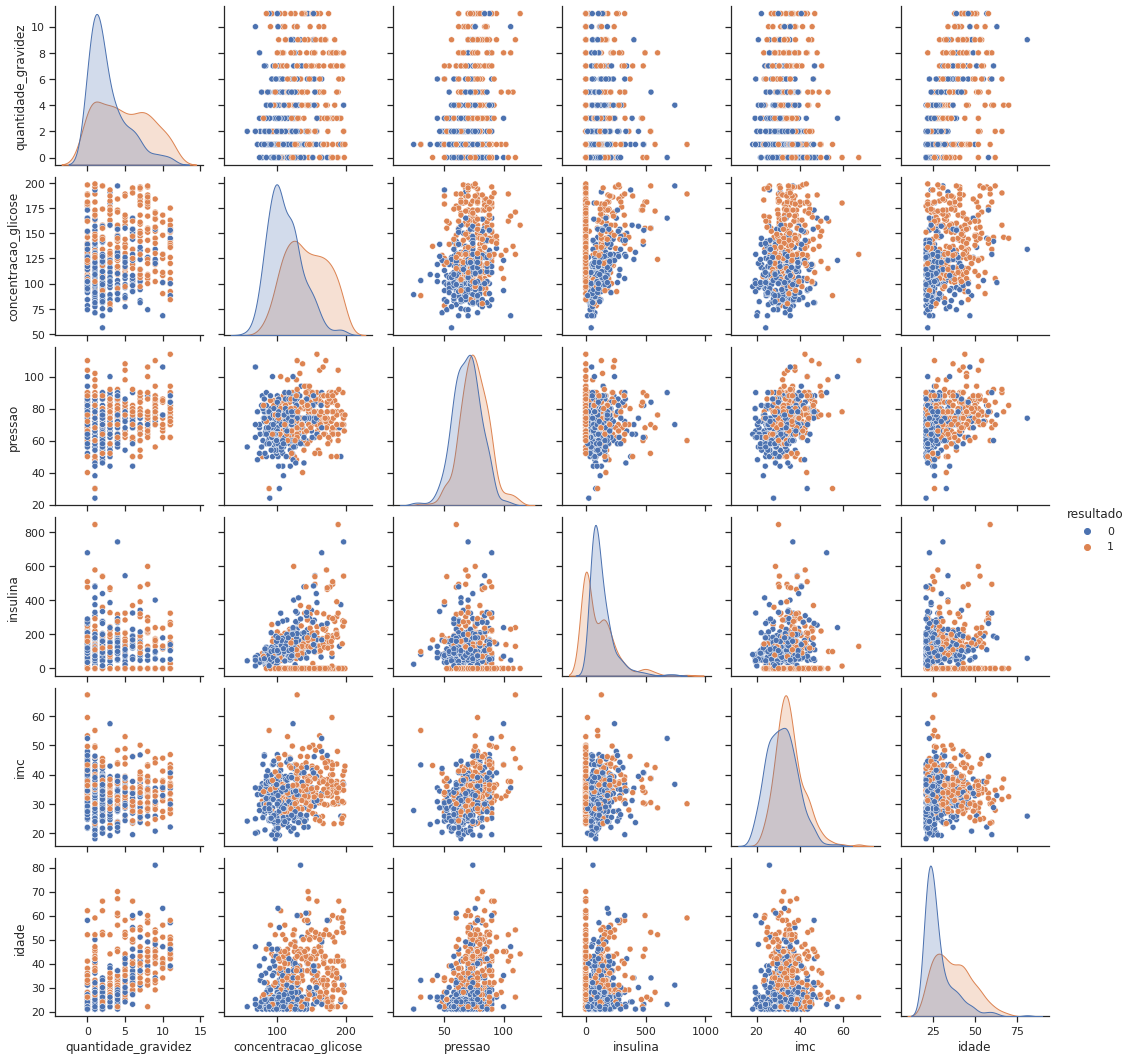

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_theme(style="ticks")

sns.pairplot(dados, hue="resultado")

Nota-se que visualemnte não conseguimos tirar muitas informações das variáveis e seus relacionamentos. Entretanto, observa-se que os valores de positivo e negativo para diabetes se distribuem de forma diferente nas variáveis

In [45]:
dados.describe()

,quantidade_gravidez,concentracao_glicose,pressao,insulina,imc,idade,resultado
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,3.720157,126.624266,72.029354,119.714286,33.486888,32.729941,0.487280
std,3.198340,31.519551,12.478889,123.235820,6.922685,11.034237,0.500328
min,0.000000,56.000000,24.000000,0.000000,18.200000,21.000000,0.000000
25%,1.000000,102.000000,64.000000,30.500000,28.850000,24.000000,0.000000
50%,3.000000,123.000000,72.000000,95.000000,33.200000,29.000000,0.000000
75%,6.000000,148.000000,80.000000,168.000000,37.550000,40.000000,1.000000
max,11.000000,199.000000,114.000000,846.000000,67.100000,81.000000,1.000000


## 4. Modelos de Machine Learning

Este é um projeto para a utilização de modelos de classificação visto que nossa variável dependente mostra se a pessoa é diabética ou não. Dessa forma, o indivíduo seria classificado como diabético ou não. Entretanto, nesse caso não queremos saber se é ou não, e sim sua probabilidade de ser diabético.

In [46]:
dados.shape

(511, 7)

Como temos apenas 511 amostras (poucos dados), faremos a avaliação dos modelos através do método de validação cruzada KFold

In [47]:
dados.loc[dados.concentracao_glicose > 200]

,quantidade_gravidez,concentracao_glicose,pressao,insulina,imc,idade,resultado


In [48]:
X = dados.drop('resultado', axis=1)
y = dados.resultado

In [49]:
# Configuraçaõ da Validação Cruzada

from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_validate

validacao = RepeatedKFold(n_splits = 10, n_repeats = 20)
# repete o processo (n_splits * n_repeats) vezes

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 

### Algoritmo Árvore de Decisão

In [51]:
clf_arvore = DecisionTreeClassifier(max_depth = 4) 
medidas = cross_validate(clf_arvore, X, y, cv = validacao, scoring = 'accuracy')
acuracia = medidas['test_score'].mean()

print('Acurácia Árvore de Decisão: {:.2f}%'.format(100*acuracia))

Acurácia Árvore de Decisão: 83.59%


In [52]:
clf_arvore.fit(X, y)



DecisionTreeClassifier(max_depth=4)

In [53]:
import numpy as np
eu = {'quantidade_gravidez':0, 'concentracao_glicose': 120, 'pressao':80, 'insulina':15, 'imc':23, 'idade':35 }

eu = pd.DataFrame(data = eu, index=[0])
probabilidade_clf = clf_arvore.predict_proba(eu)[0][1]

print('A probabilidade de ser diabética é de {:.2f}%'.format(probabilidade_clf * 100))

A probabilidade de ser diabética é de 8.33%


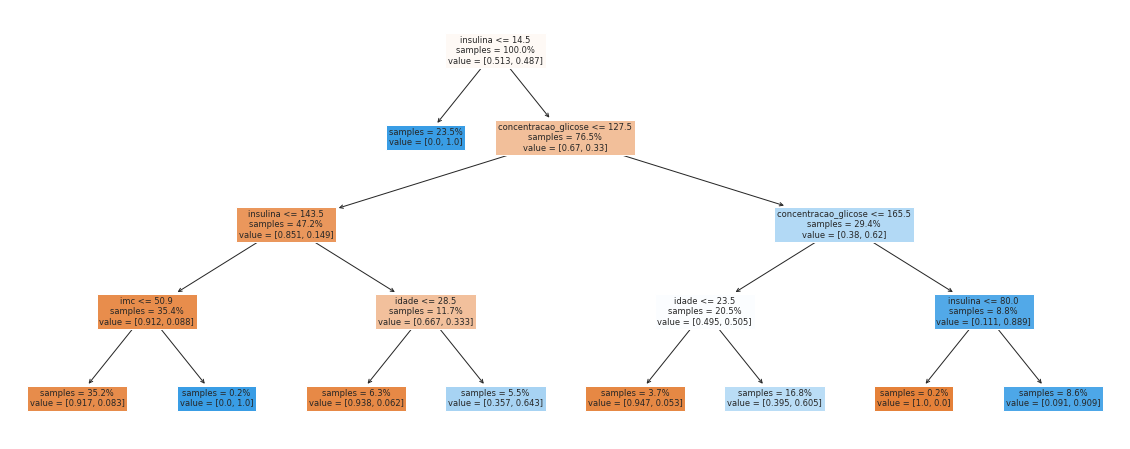

In [54]:
from sklearn.tree import plot_tree

plt.figure(figsize = (20, 8))
plot_tree(clf_arvore, filled=True, proportion = True, impurity = False, feature_names = X.columns)
plt.show()

### Regressão Logística

In [55]:
from sklearn.linear_model import LogisticRegression 

modelo_log = LogisticRegression() 


medidas = cross_validate(modelo_log, X, y, cv = validacao, scoring = 'accuracy')
acuracia = medidas['test_score'].mean()

print('Acurácia Regressão Logística: {:.2f}%'.format(100*acuracia))

Acurácia Regressão Logística: 78.90%


In [56]:
modelo_log.fit(X, y)


LogisticRegression()

In [57]:
import numpy as np
eu = {'quantidade_gravidez':0, 'concentracao_glicose': 120, 'pressao':80, 'insulina':15, 'imc':23, 'idade':35 }

eu = pd.DataFrame(data = eu, index=[0])
probabilidade_log = modelo_log.predict_proba(eu)[0][1]

print('A probabilidade de ser diabética é de {:.2f}%'.format(probabilidade_log * 100))

A probabilidade de ser diabética é de 31.71%


### KNN

In [58]:
from sklearn.neighbors import KNeighborsClassifier 

modelo_knn = KNeighborsClassifier(n_neighbors = 80)

medidas = cross_validate(modelo_knn, X, y, cv = validacao, scoring = 'accuracy')
acuracia = medidas['test_score'].mean()

print('Acurácia KMN: {:.2f}%'.format(100*acuracia))


Acurácia KMN: 79.99%


In [60]:
modelo_knn.fit(X, y)

KNeighborsClassifier(n_neighbors=80)

In [61]:
import numpy as np
eu = {'quantidade_gravidez':0, 'concentracao_glicose': 120, 'pressao':80, 'insulina':15, 'imc':23, 'idade':35 }

eu = pd.DataFrame(data = eu, index=[0])
probabilidade_knn = modelo_knn.predict_proba(eu)[0][1]

print('A probabilidade de ser diabética é de {:.2f}%'.format(probabilidade_knn * 100))

A probabilidade de ser diabética é de 88.75%


### Combinação dos modelos

In [62]:
from sklearn.ensemble import VotingClassifier
 

modelos = [('Árvore', clf_arvore), ('Reg. Log.', modelo_log), ('KNN', modelo_knn) ]

modelo = VotingClassifier(modelos, voting = 'soft')

medidas = cross_validate(modelo, X, y, cv = validacao, scoring = 'accuracy')
acuracia_modelos = medidas['test_score'].mean()

print('Acurácia da combinação dos modelos: {:.2f}%'.format(100*acuracia_modelos))


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Acurácia da combinação dos modelos: 83.19%


## 5. Avaliação dos Modelos

Nota-se que a combinação dos modelos nos deu uma resposta com maior acurácia do que os modelos individualmente. Dessa forma, opta-se por seguir usando o modelo criado a partir da combinação dos mesmos.

In [63]:
modelo.fit(X,y)

VotingClassifier(estimators=[('Árvore', DecisionTreeClassifier(max_depth=4)),
                             ('Reg. Log.', LogisticRegression()),
                             ('KNN', KNeighborsClassifier(n_neighbors=80))],
                 voting='soft')

In [64]:
import numpy as np
eu = {'quantidade_gravidez':0, 'concentracao_glicose': 120, 'pressao':80, 'insulina':15, 'imc':23, 'idade':35 }

eu = pd.DataFrame(data = eu, index=[0])
probabilidade = modelo.predict_proba(eu)[0][1]

print('A probabilidade de ser diabética é de {:.2f}%'.format(probabilidade * 100))

A probabilidade de ser diabética é de 42.93%


## Testando sua probabilidade de ser diabética

In [ ]:


gravidez = int(input('Quantas vezes já ficou grávida? '))
glicose = int(input('Insira a concetração de glicose no seu útlimo exame de curva glicêmica 2 horas depois de ter bebido o líquido açucarado: '))
pressao = int(input('Insira sua pressão diastólica (a menor delas): '))
insulina = int(input('Insira a insulina sérica no seu útlimo exame de curva insulinêmica 2 horas depois de ter bebido o líquido açucarado: '))
peso = float(input('Insira seu peso em quilos: '))
altura = float(input('Insira sua altura em metros: '))
imc = peso / (altura**2)
idade = float(input('Qual sua idade? '))

pessoa = {'quantidade_gravidez': gravidez, 'concentracao_glicose': glicose, 'pressao': pressao, 'insulina': insulina, 'imc': imc, 'idade': idade }

pessoa = pd.DataFrame(data = pessoa, index=[0])
probabilidade = modelo.predict_proba(eu)[0][1]

print('A probabilidade de ser diabética é de {:.2f}%'.format(probabilidade * 100))

